In [12]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [13]:
mpl.__version__

'3.6.2'

In [14]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [15]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [17]:
plt.style.use("../matplotlib_style.txt")

## Fig S2: Distribution of some terms and phrases across the biomedical literature

### Import

In [18]:
# import clean_df_updated
clean_df_updated_reparsed_filtered = pd.read_pickle(
    berenslab_data_path / "clean_df_updated_reparsed_filtered"
)

In [19]:
all_abstracts = clean_df_updated_reparsed_filtered.AbstractText

In [20]:
tsne_reparsed = np.load(variables_path / "tsne_reparsed.npy")

In [21]:
tsne_bert = np.vstack((-tsne_reparsed[:, 0], tsne_reparsed[:, 1])).T

### Plot

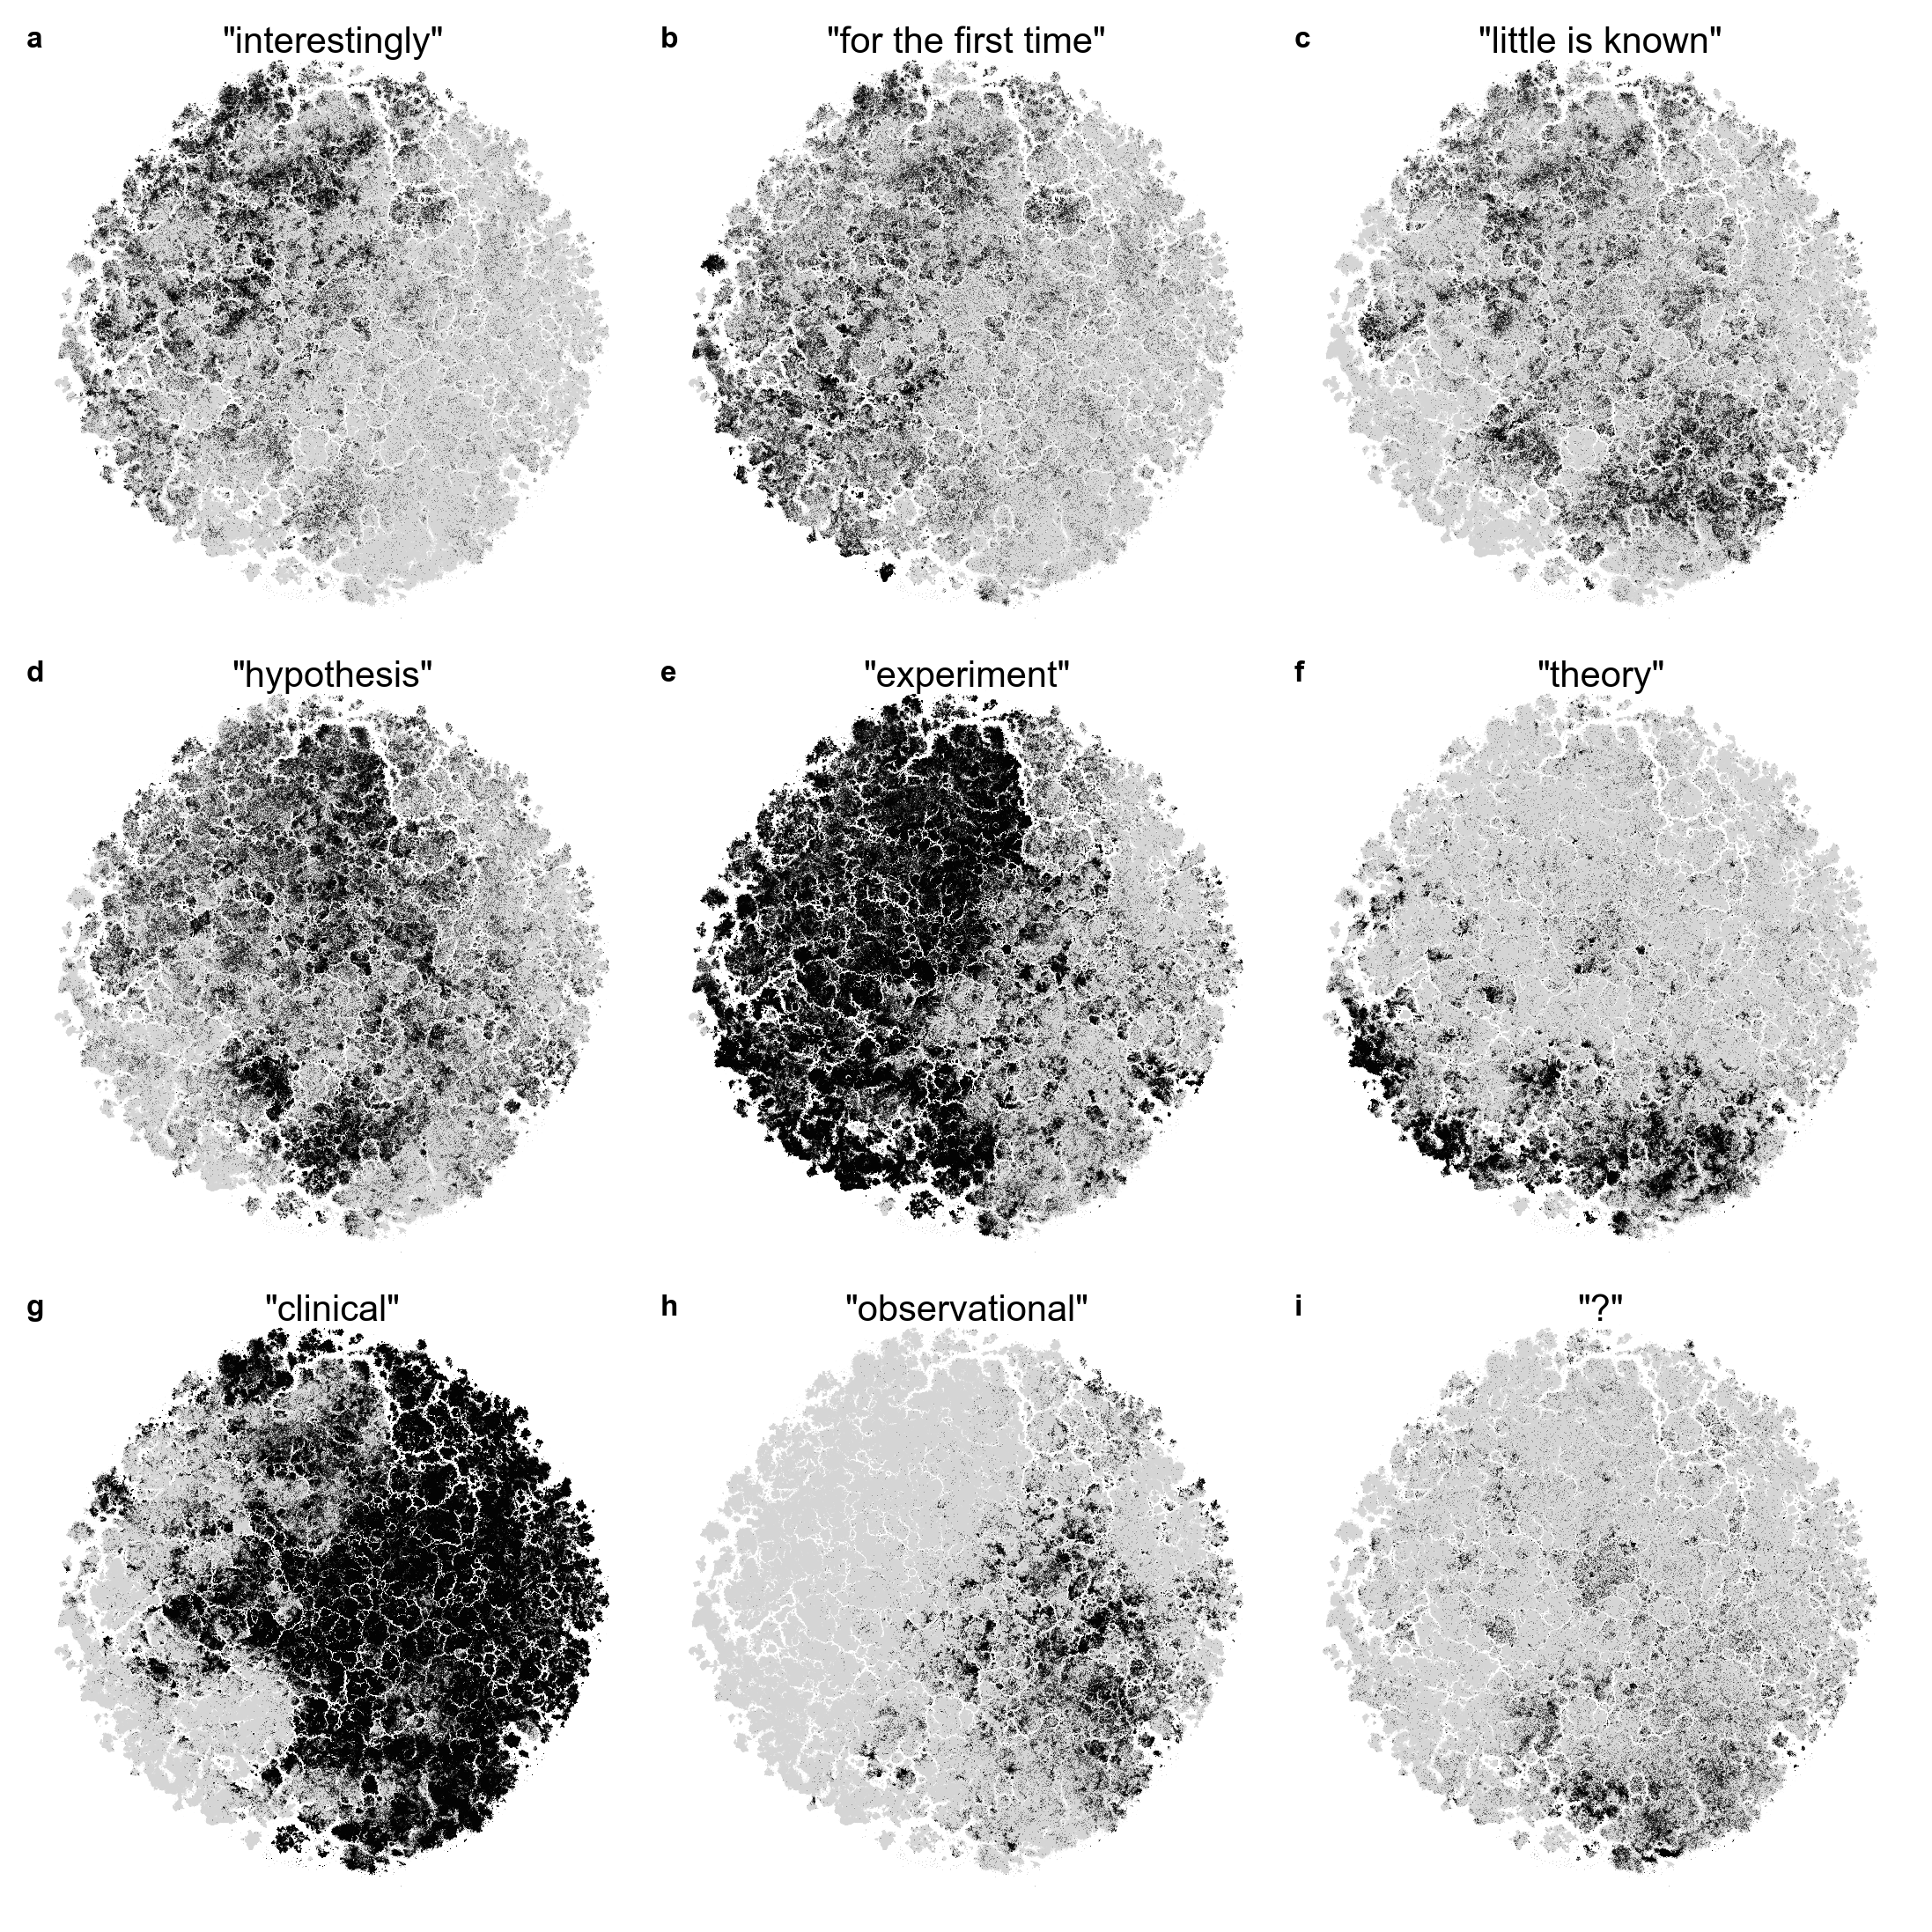

In [22]:
%matplotlib inline

fig, axs = plt.subplots(
    3, 3, figsize=(7.2, 7.2), dpi=300, layout="constrained"
)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-240, 240)
y_lim = (-240, 240)
tsne = tsne_bert

words = [
    "interestingly",
    "for the first time",
    "little is known",
    "hypothesis",
    "experiment",
    "theory",
    "clinical",
    "observational",
    "?",
]

for i, ax in enumerate(axs.flat):
    plot_tsne_word(
        all_abstracts,
        words[i],
        tsne,
        x_lim=x_lim,
        y_lim=y_lim,
        ax=ax,
        title_on=True,
        plot_type="subplot_3",
        verbose=False,
    )
    ax.text(
        0, 1, string.ascii_lowercase[i], transform=ax.transAxes, **txtkwargs
    )

fig.savefig(figures_path / "fig_S2_interesting_embeddings.pdf", dpi=300)
fig.savefig(figures_path / "fig_S2_interesting_embeddings.png", dpi=300)